# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis

* Formerly 046193 

#### Tal Daniel

## Tutorial 00 - Probability, Optimization and Inequalities  Refresher

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Probability Basics
    * Bayes Rule
    * Expectation & Variance
* Lagrange Multipliers
* Useful Inequalities
    * Markov
    * Chebyshev
    * Hoeffding 

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## <img src="https://img.icons8.com/office/80/000000/dice.png" style="height:50px;display:inline"> Probability Basics

| Term | Usually donated by | Definition | Example  |
| --- | --- | --- | --- |
| **Experiment** | | <center>any procedure that can be infinitely repeated and has a well-defined set of possible outcomes </center>|<center> toss a coin twice </center> |
| **Sample** | $\omega$ |<center> A single outcome of an experiment </center>|<center>  A single outcome. for example: $H$ </center>|
| **Sample Space** | $\Omega$ | <center>The set of all possible outcomes </center>| <center> The set of all possible outcomes, for example: {HH, HT, TH, TT} </center>|
| **Event** | $A$ | <center>a subset of possible outcomes </center>| <center>A = {HH} , B= {HT, TH}  <br> An empty set  $\emptyset$ <br> The entire set (any outcome): $\Omega$ </center>|
| **Event Space** | $\mathcal{F}$ | <center>The space of all possible events </center>| <center> $\{HH\}, \{HT\}, \{TH\}, \{TT\}, \{\emptyset\}, \{\Omega\}$ </center> |
| **Probability** | P, Pr |<center> A function $P:\mathcal{F}\rightarrow\left[0,1\right]$ which assigns a probability to each event </center>| <center> $P(HT) = \frac{1}{4}$<br> $P(\emptyset)=0$<br>$P(\Omega)=1$ </center>|

## <img src="https://img.icons8.com/clouds/64/000000/handshake.png" style="height:50px;display:inline"> Joint Probability
* **Joint Probability - Pr(A,B)** - the probability the both event A and event B happen ($Pr(A,B) \geq 0$)
* **Marginal Distributions** -
    * $\sum_i Pr(A_i, B_j) = Pr(B_j)$
    * $\sum_j Pr(A_i, B_j) = Pr(A_i)$
* **Law of Total Probability** - suppose the events $B_1, B_2, ..., B_k$ are mutually exclusive (intersection of all events is zero) and form a partition of the sample space (i.e. one of them must occur), then for any event $Pr(A)$: $$Pr(A) = \sum_{j=1}^k Pr(A|B_j)P(B_j)$$

* **Conditioning** - if A and B are events and $Pr(B) > 0$, the **conditional probability of A given B** is: $Pr(A|B)$
    * $Pr(A|B) = \frac{P(A,B)}{P(B)}$
    * $\rightarrow Pr(A,B) = Pr(A|B)Pr(B)$
    * **the chain rule** - in the general case: $$Pr(\bigcap_i A_i) = \prod_{i=n}^1 Pr(A_i|A_{i-1}, ..., A_1)$$
        * $Pr(A,B,C) = P(A|B,C)P(B,C) = P(A|B,C)P(B|C)P(C)$
        * Is that the only option? No! $Pr(A,B,C) = P(C|A,B)P(A,B) = P(C|A,B)P(B|A)P(A)$
    
* **Independence** - 
    * Two events A and B are independent iff
        * $Pr(A|B) = Pr(A)$
        * $Pr(A,B) = Pr(A)Pr(B)$
    * For a set of events $\{A_i\}$, independence:
        * $Pr(\bigcap_i A_i) = \prod_i Pr(A_i)$
* **Conditional Independence** - Events A and B are conditionally independent given C:
    * $Pr(A,B|C) = Pr(A|C)Pr(B|C)$
    * $Pr(A|B,C) = Pr(A|C)$
    
    
## <img src="https://img.icons8.com/dusk/64/000000/variable.png" style="height:50px;display:inline"> Continuous Random Variables
Assume $X$ is a continuous random variable. We define the following:
* **Cumulative Distribution Function (CDF)** - $F(x) = P(X \leq x)$
    * The CDF is monotonically non-decreasing
    * $ p(a < X \leq b) = F(b) - F(a)$
    * $\lim_{a\to\infty} F_x(a) = 1$
    * $\lim_{a\to 0} F_x(a) = 0$
* **Probability Density Function (PDF)** - $f(x) = \frac{d}{dx}F(x)$
    * $p(a < X \leq b) = \int_a^b f(x)dx $
* All we have seen for **discrete** variables hold for **continuous** by replacing the sum with an integral

## <img src="https://img.icons8.com/dusk/64/000000/b.png" style="height:50px;display:inline"> Bayes Rule
Suppose that the events $B_1, ..., B_k$ are mutually exclusive and form a partiotion of the sample space (i.e. one of them must occur), then for any event $Pr(A)$, **Bayes Rule**:
$$Pr(B_i|A) = \frac{Pr(A,B_i)}{Pr(A)} = \frac{Pr(A|B_i)Pr(B_i)}{Pr(A)} = \frac{Pr(A|B_i)Pr(B_i)}{\sum_{j=1}^k Pr(A|B_j)Pr(B_j)}$$

* **Posterior Distribution** - $Pr(B_i|A)$
* **Liklihood Distribution** - $Pr(A|B_i)$
* **Prior Distribution** - $Pr(B_i)$
* **Evidence** - $Pr(A)$

#### <img src="https://img.icons8.com/dusk/64/000000/high-priority.png" style="height:50px;display:inline"> REMEMBER THESE!

<img src="./assets/naive_bayes_icon.png">
(image from http://uc-r.github.io/naive_bayes)

## <img src="https://img.icons8.com/dusk/64/000000/statistics.png" style="height:50px;display:inline"> Mean & Variance
### Mean (Expectation) - $\mu$
The mean is the probability weighted average of all possible values.
* Discrete Variables:
    * $\mathbb{E}[X] = \sum_{x \in X} xp(x)$
    * $\mathbb{E}[f(X)] = \sum_{x \in X} f(x)p(x)$
* Continuous Variables:
    * $\mathbb{E}[X] = \int_x xp(x)$
    * $\mathbb{E}[f(X)] = \int_{x \in X} f(x)p(x)$
* Example: the mean of a fair six-sided dice: $$\mathbb{E}[X] = 1*\frac{1}{6} + 2*\frac{1}{6} + 3*\frac{1}{6} + 4*\frac{1}{6} + 5*\frac{1}{6} + 6*\frac{1}{6} = 3.5$$

* **Empirical Mean**: if $X \sim P(x)$ and we are given $N$ i.i.d. samples of $X$, the empirical mean: $$ \overline{X}_N = \frac{1}{N}\sum_{i=1}^N X_i $$
    * The empirical mean is also **R.V.** as a sum of RVs is also an RV. 
    * It converges to the actual mean as we will see shortly.
        * What does this mean that the "random variable converges?" **It is not a number!**.
* **The Law of Total Expectation (Smoothing Theorem)**: $$\mathbb{E}[X] = \mathbb{E}\big[\mathbb{E}[X|Y] \big] $$
    * Proof: $\mathbb{E}\big[\mathbb{E}[X|Y] \big] = \mathbb{E}\big[ \sum_x x \cdot P(X=x|Y) \big] = \sum_y \big[ \sum_x x \cdot P(X=x|Y) \big] \cdot P(Y=y) = \sum_y \big[ \sum_x x \cdot P(X=x|Y) \cdot P(Y=y)\big] = \sum_y \big[ \sum_x x \cdot P(X=x, Y=y)\big] = \sum_x x\cdot \big[ \sum_y \cdot P(X=x, Y=y)\big] = \sum_x x\cdot \big[P(X=x)\big] = \mathbb{E}[X]$
    * Example: Suppose that two factories supply light bulbs to the market. Factory X's bulbs work for an average of 5000 hours, whereas factory Y's bulbs work for an average of 4000 hours. It is known that factory X supplies 60% of the total bulbs available. What is the expected length of time that a purchased bulb will work for? $$\mathbb{E}[L] = \mathbb{E}\big[\mathbb{E}[L|factory] \big] = \mathbb{E}[L|X] \cdot P(X) + \mathbb{E}[L|Y] \cdot P(Y) = 5000 \cdot 0.6 + 4000 \cdot 0.4 = 4600$$
    
### Variance - $\sigma^2$
The variance is a measure of the "spread" of the distribution (can also be considered as confidence).

* $var[X] = \mathbb{E}[(X - \mu)^2] = \sum (x-\mu)^2 p(x) = \sum x^2 p(x) + \mu^2 \sum p(x) -2 \mu \sum x p(x) =  \mathbb{E}[X^2] - \mu^2$
* **The Standard Deviation** - $std[X] = \sqrt{var[X]}$
* Example: the varaiance of a fair six-sided dice: $$var[X] = \sum_{i=1}^6 \frac{1}{6} (i-3.5)^2$$ $$ E[X^2] = 1^2 *\frac{1}{6} + 2^2 *\frac{1}{6} + 3^2 *\frac{1}{6} + 4^2*\frac{1}{6} + 5^2*\frac{1}{6} + 6^2*\frac{1}{6} = \frac{91}{6} $$ $$ var[X] = E[X^2] -\mu ^2 = \frac{91}{6} - 3.5^2 \approx 2.92 $$

## <img src="https://img.icons8.com/ultraviolet/80/000000/heat-map.png" style="height:50px;display:inline"> Vectors of Random Variables
* Let $\overline{X}$ be a d-dimensional **random** vector
    * $\overline{X} = [x_1, x_2, ..., x_d]$
* The d-dimensional **mean vector $\overline{\mu}$** is:
    * $\overline{\mu} = \mathbb{E}[\overline{X}] = [\mathbb{E}[x_1], \mathbb{E}[x_2], ..., \mathbb{E}[x_d]] = [\mu_1, \mu_2, ..., \mu_d]$
* The **covariance matrix $\Sigma$** is defined as the (**square**) matrix, where each component $\sigma_{ij}$ is the covariance of $x_i, x_j$:
    * $\sigma_{ij} = \mathbb{E}[(x_i - \mu_i)(x_j - \mu_j)]$
    * $$\Sigma = 
 \begin{pmatrix}
  \sigma_1 ^2 & \sigma_{1,2} & \cdots & \sigma_{1,d} \\
  \sigma_{2,1} & \sigma_2^2 & \cdots & \sigma_{2,d} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{d,1} & \sigma_{d,2} & \cdots & \sigma_d^2 
 \end{pmatrix}$$
 
## <img src="https://img.icons8.com/office/80/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Multivariate Normal Distribution
* $ x \sim N_d (\mu, \Sigma)$
* $$f(x) = \frac{1}{(2\pi)^{\frac{d}{2}} |\Sigma|^{\frac{1}{2}}} e^{- \frac{1}{2}(x - \mu)^{T} \Sigma^{-1} (x - \mu)}$$

<IPython.core.display.Javascript object>


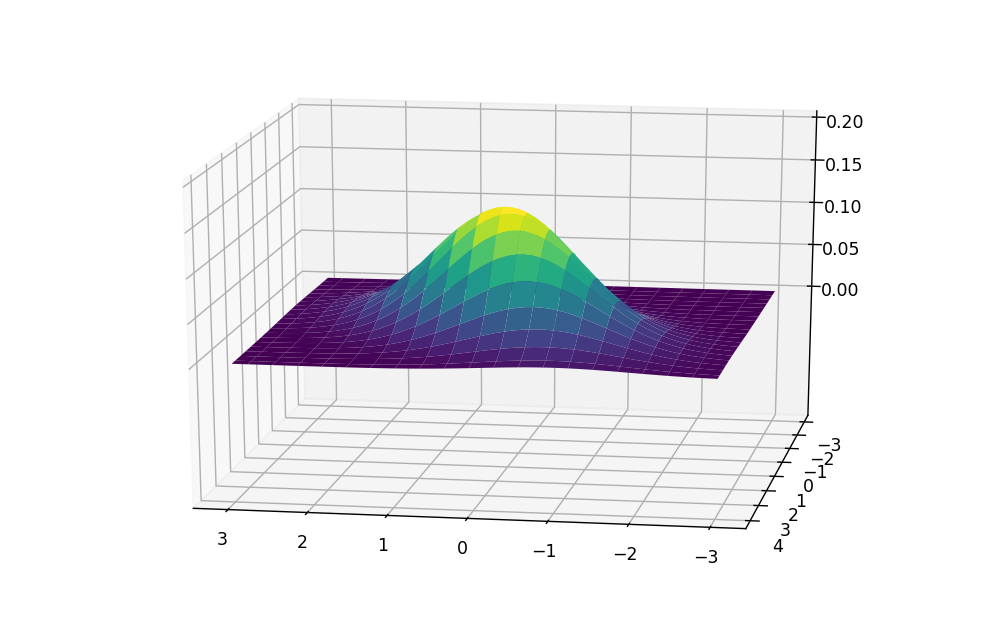

In [2]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
%matplotlib notebook
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

# cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)
plt.tight_layout()

plt.show()

### <img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"> Largrange Multipliers
* A method for optimization with **equality constraints**
* The general case: $$ \min f(x,y) $$ $$ \textit{s.t. (subject to)}: g(x,y)=0 $$
* The *Lagrange* function (*Lagrangian*) is defined by: $$ \mathcal{L}(x,y,\lambda) = f(x,y) -\lambda \cdot g(x,y) $$
* Geometric Intuition: let's look at the following figure - <br>
    * <img src="./assets/tut_01_lagrange.jpg" style="height:400px"> <br>
    * To maximize $f(x,y)$ subject to $g(x,y)=0$ is to find the largest value $c \in \{7,8,9,10,11\}$ such that the level curve (contour) $f(x,y) = c$ intersects with $g(x,y)=0$
    * It happens when the curves just touch each other
        * When they have a common tangent line
    * Otherwise, the value of $c$ should be increased
    * Since the gradient of a function is **perperndicular** to the contour lines:
        * The *contour lines* of $f$ and $g$ are **parallel** iff the *gradients* of $f$ and $g$ are **parallel**
        * Thus, we want points $(x,y)$ where $g(x,y) = 0$ and $$\nabla_{x,y}f(x,y)=\lambda \nabla_{x,y} g(x,y) $$
            * $\lambda$ - *"The Lagrange Multiplier"* is required to adjust the **magnitudes** of the (parallel) gradient vectors.
            
###  <img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"><img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"> Multiple Constraints
* Extenstion of the above for problems with **multiple constraints** using a similar argument
* The general case: minimze $f(x)$ s.t. $g_i(x)=0$, $i = 1,2,..., m$ 
* The **Lagrangian** is a weighted sum of objective and constraint functions: $$ \mathcal{L}(x, \lambda_1, ..., \lambda_m) = f(x) - \sum_{i=1}^m \lambda_i g_i(x)$$
    * $\lambda_i$ is the Lagrange multipler associated with $g_i(x) = 0$
* The **solution** is obtained by solving the (unconstrained) optimization problem: $$\nabla_{x, \lambda_1, ..., \lambda_m}\mathcal{L}(x, \lambda_1, ..., \lambda_m) = 0 \iff \begin{cases}
    \nabla_x \big[f(x) - \sum_{i=1}^m \lambda_ig_i(x) = 0 \big]\\
    g_1(x) = ... = g_m(x) = 0
  \end{cases}$$
  * Amounts to solving $d + m$ equations in $d+m$ unkowns
      * $d = |x|$ is the dimension of $x$
      
#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Max Entropy Distribution
Maximize $H(P) = -\sum_{i=1}^d p_i \log p_i$ subject to $\sum_{i=1}^d p_i = 1$
#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
* The Lagrangian is: $$L(P,\lambda) = -\sum_{i=1}^d p_i \log p_i -\lambda \big(\sum_{i=1}^dp_i -1 \big) $$
* Find stationary point for $L$:
    * $\forall i$, $\frac{\partial L(P,\lambda)}{\partial p_i} = -\log p_i -1 -\lambda =0 \rightarrow p_i = e^{-\lambda - 1}$
    * $\frac{\partial L(P,\lambda)}{\partial \lambda} = -\sum_{i=1}^d p_i + 1 = 0 \rightarrow \sum_{i=1}^d e^{-\lambda - 1} = 1 \rightarrow e^{-\lambda - 1} = \frac{1}{d} = p_i$
    * The Max Entropy distribution is the **uniform distribution**.

## <img src="https://img.icons8.com/bubbles/50/000000/thumb-up.png" style="height:50px;display:inline"> Useful Inequalities
* **Markov Inequality** - for a non-negative R.V (Random Variable) $X \geq 0$ and for *any*  positive number $\lambda > 0$: $$ Pr(X \geq \lambda) \leq \frac{\mathbb{E}[X]}{\lambda} $$
    * Proof: Assume $X$ can take values $x_1 < x_2 < ... <x_j = \lambda < ... <x_n$, then:
    $$ \mathbb{E}[X] = \sum_{i=1}^n x_i \cdot Pr(X=x_i) \geq \sum_{i=j}^n x_i \cdot Pr(X=x_i) \geq \sum_{i=j}^n \lambda \cdot Pr(X=x_i) = \lambda \cdot \sum_{i=j}^n Pr(X=x_i) =  \lambda \cdot Pr(X \geq \lambda)$$
    
* **Chebyshev Inequality** - for any R.V (Random Variable)  $X \geq 0$ and for *any*  positive number $\lambda > 0$: $$ Pr(|X-\mathbb{E}[X]| \geq \lambda) \leq \frac{Var(X)}{\lambda^2} $$
    * Proof using the Markov Inequality.
* **Hoeffding Inequality** -  Let $X_1, ..., X_n$ be i.i.d. random variables, bounded by the intervals $a_i \leq X_i \leq b_i$. Let the empirical mean be defined according to $\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i$. It holds that: $$ P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}} $$

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/